# We need to predict if the client will be able to repay the loan or not.****

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data                  = pd.read_csv("/kaggle/input/homeloan/Data/application_train.csv")
bureau                = pd.read_csv("/kaggle/input/homeloan/Data/bureau.csv")
bureau_balance        = pd.read_csv("/kaggle/input/homeloan/Data/bureau_balance.csv")
credit_card_balance   = pd.read_csv("/kaggle/input/homeloan/Data/credit_card_balance.csv")
installments_payments = pd.read_csv("/kaggle/input/homeloan/Data/installments_payments.csv")
pos_cash_balance      = pd.read_csv("/kaggle/input/homeloan/Data/POS_CASH_balance.csv")
previous_application  = pd.read_csv("/kaggle/input/homeloan/Data/previous_application.csv")

In [3]:
print ("application_train     :",data.shape)
print ("bureau                :",bureau.shape)
print ("bureau_balance        :",bureau_balance.shape)
print ("credit_card_balance   :",credit_card_balance.shape)
print ("installments_payments :",installments_payments.shape)
print ("pos_cash_balance      :",pos_cash_balance.shape)
print ("previous_application  :",previous_application.shape)

application_train     : (307511, 122)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


application_train.csv: This is the main table with Terget variable.The training applicaton data comes with the TARGET indicating 0: the loan was repaid of 1: the loan was not repaid.

bureau.csv: All client’s previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

bureau_balance.csv: Monthly balances of previous credits in Credit Bureau.

POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

credit_card_balance.csv: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

previous_application.csv: All previous applications for Home Credit loans of clients who have loans in our sample.

installments_payments.csv: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

4. Existing Approaches

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.shape

(307511, 122)

In [6]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
pd.set_option('display.max_rows', data.shape[0])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


0    282686
1     24825
Name: TARGET, dtype: int64

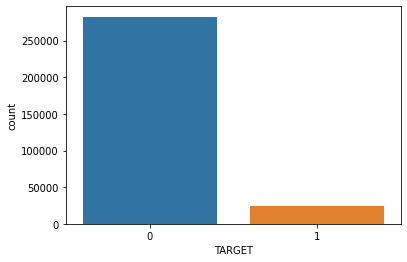

In [9]:
sns.countplot(x = "TARGET", data = data)
data.loc[:, 'TARGET'].value_counts()

The data has target = 0 for people who can repay the loan and target = 1 for people who cannot repay the loan. The data is imbalanced because there is a high number of clients who repay the loan compared to clients who default.

In [10]:
pd.DataFrame(data.isnull().sum().sort_values(ascending = False))

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAPARTMENTS_MEDI,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199


<img src="/kaggle/input/homecreditloan/Home credit  loan.png">


![C:\Users\FARIA\Downloads\PRCP-1006-HomeLoanDef\Data\Home credit  loan.png]

In [11]:
#import dtale
#dtale.show(data)

In [12]:
# Function to calculate missing values by column
def missing_values_table(data):
    # Total missing values
    mis_val = data.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns= {0: 'Missing Values', 1 : '% of Total Values'})
    
    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
     # print some summary information
    print('Your selected dataframe has ' + str(data.shape[1]) +
         " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    
    # return the dataframe with missing in information
    return mis_val_table_ren_columns


In [13]:
# missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [14]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [15]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
def plot_bar_gen(feature, df = None, orientation_horizontal = True):
    
    if df is None:
        df = data
    else:
        df = df
    
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("bright")
    
    if orientation_horizontal == True:
        plt.figure(figsize=(10,6))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        
    else:
        plt.figure(figsize=(10,12))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.8)
    plt.show();

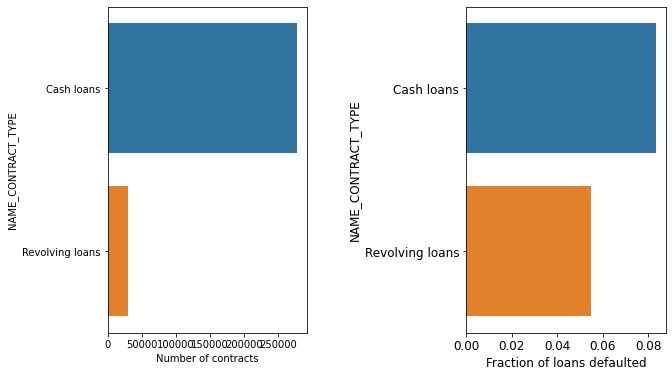

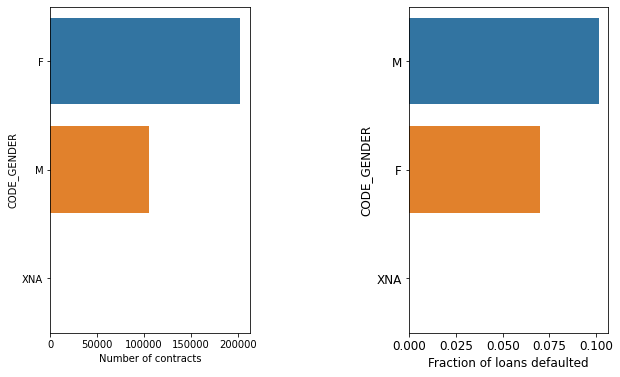

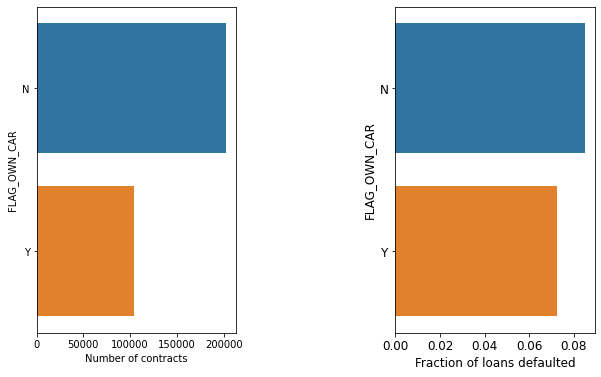

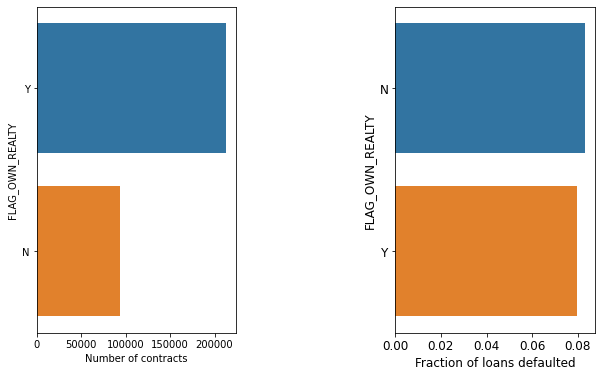

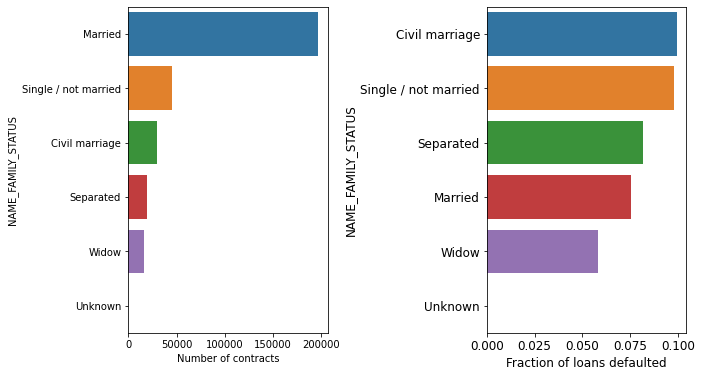

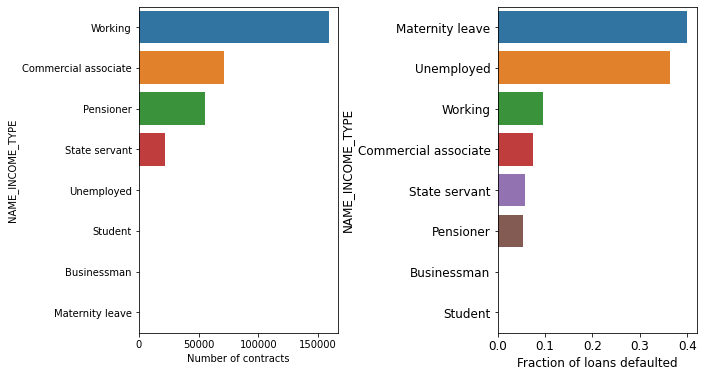

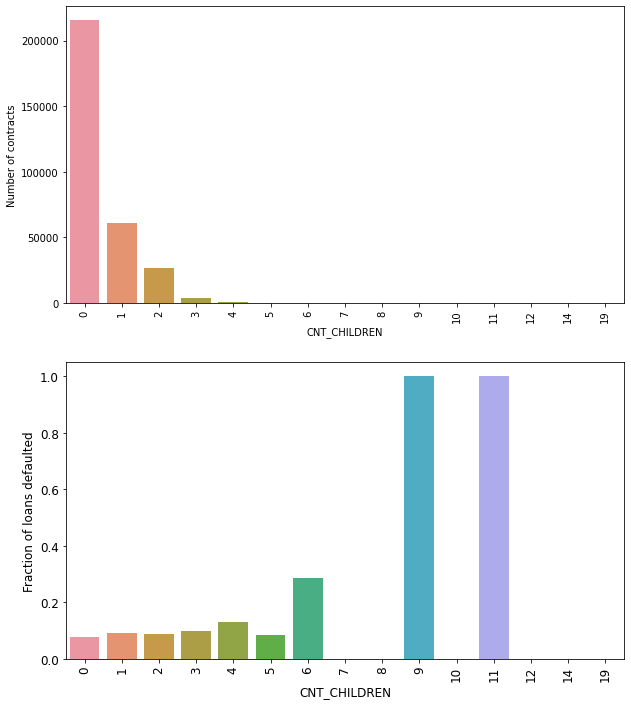

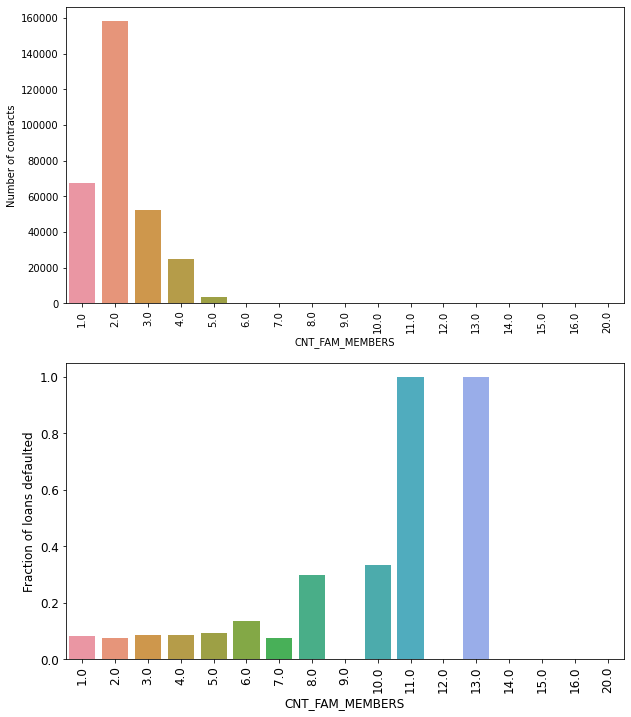

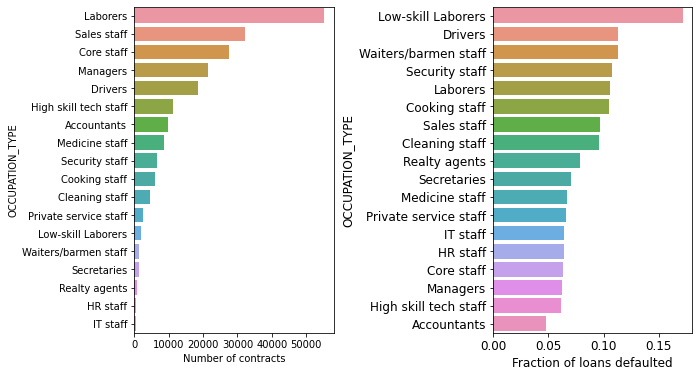

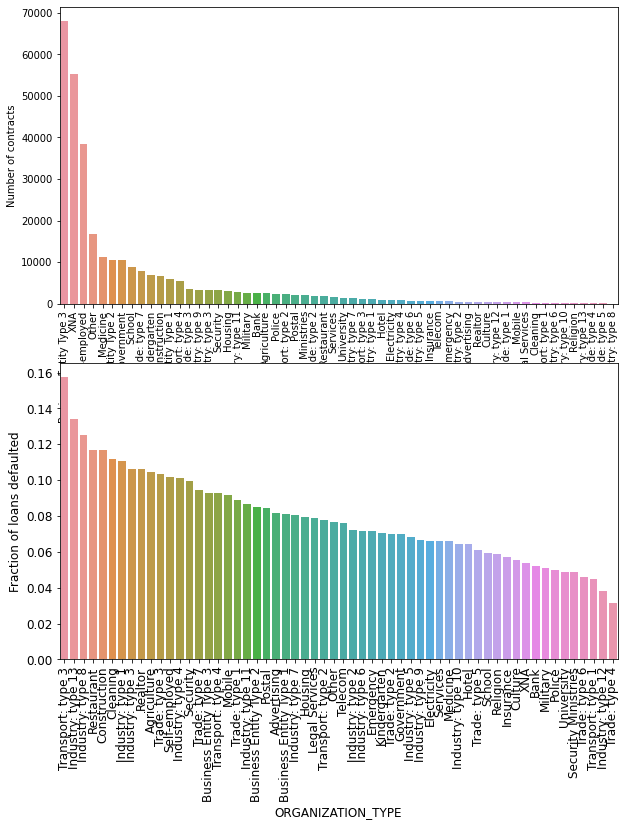

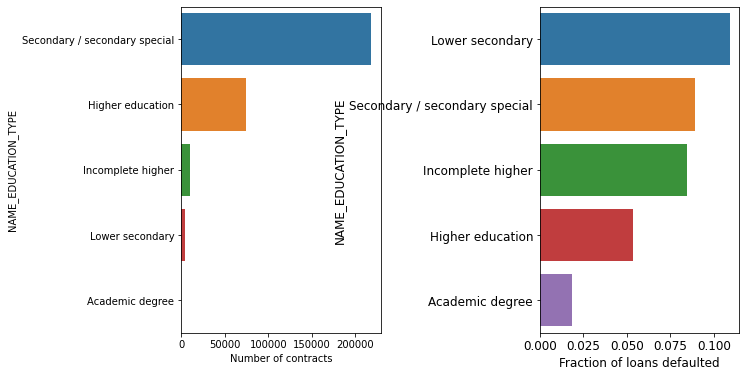

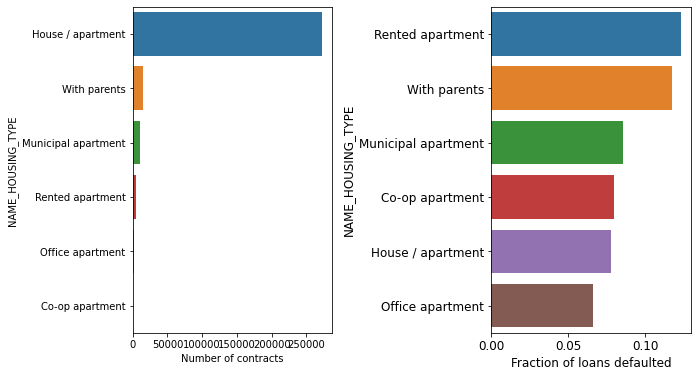

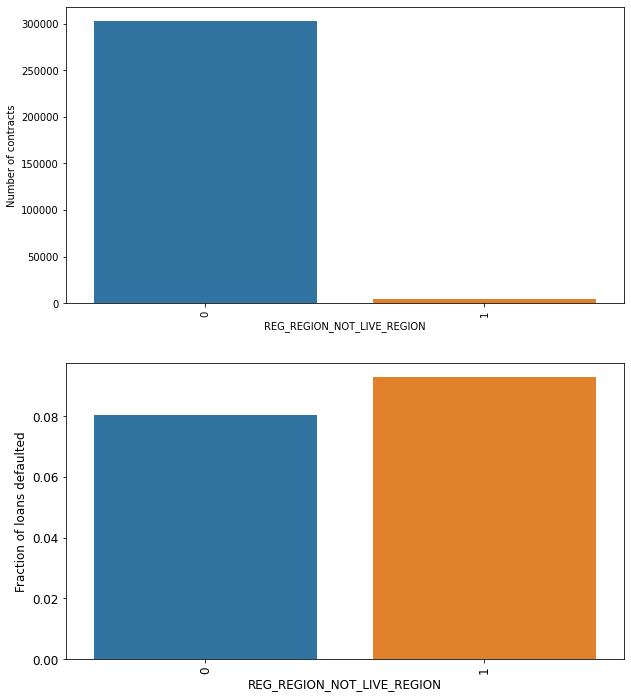

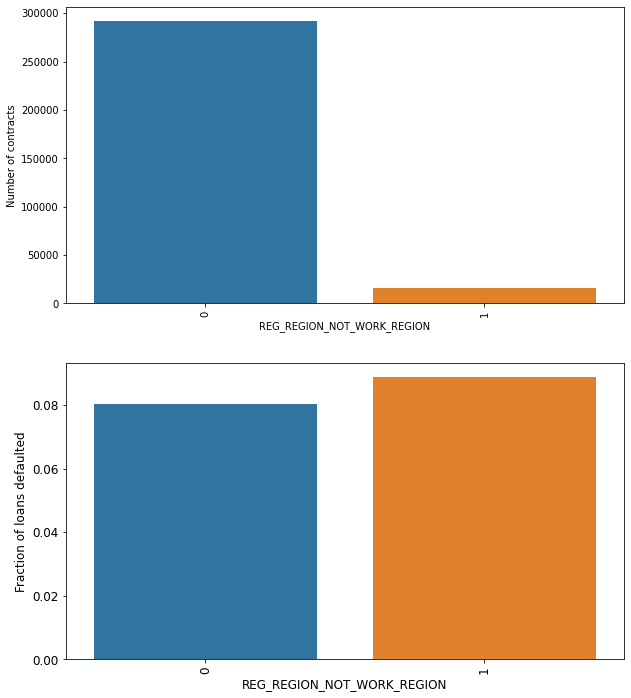

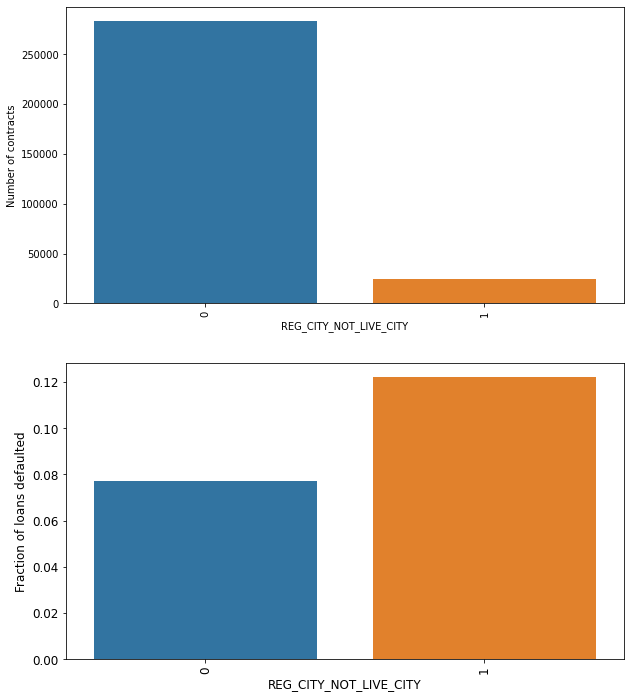

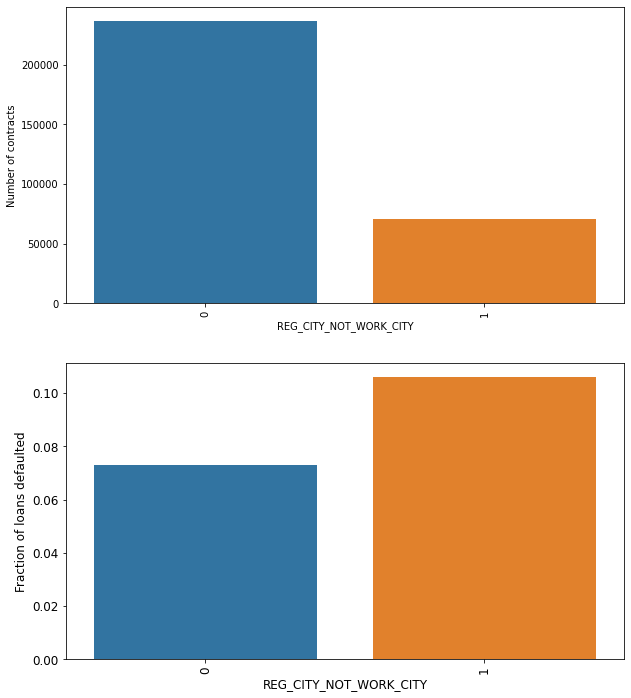

In [17]:
plot_bar_gen('NAME_CONTRACT_TYPE')
plot_bar_gen('CODE_GENDER')
plot_bar_gen('FLAG_OWN_CAR')
plot_bar_gen('FLAG_OWN_REALTY')
plot_bar_gen('NAME_FAMILY_STATUS')
plot_bar_gen('NAME_INCOME_TYPE')
plot_bar_gen('CNT_CHILDREN',None,False)
plot_bar_gen('CNT_FAM_MEMBERS',None,False)
plot_bar_gen('OCCUPATION_TYPE')
plot_bar_gen('ORGANIZATION_TYPE',None,False)
plot_bar_gen('NAME_EDUCATION_TYPE')
plot_bar_gen('NAME_HOUSING_TYPE')
plot_bar_gen('REG_REGION_NOT_LIVE_REGION',None,False)
plot_bar_gen('REG_REGION_NOT_WORK_REGION',None,False)
plot_bar_gen('REG_CITY_NOT_LIVE_CITY',None,False)
plot_bar_gen('REG_CITY_NOT_WORK_CITY',None,False)

In [18]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,df=None,separate_target=False):
    if df is None:
        df = data
    else:
        df = df
        
    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(df[feature].dropna(),color='blue', kde=True,bins=100)
    else:
        t1 = df.loc[df['TARGET'] != 0]
        t0 = df.loc[df['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
        #sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
        #sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")
        
        sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [19]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(data[feature])
    sdev=np.std(data[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

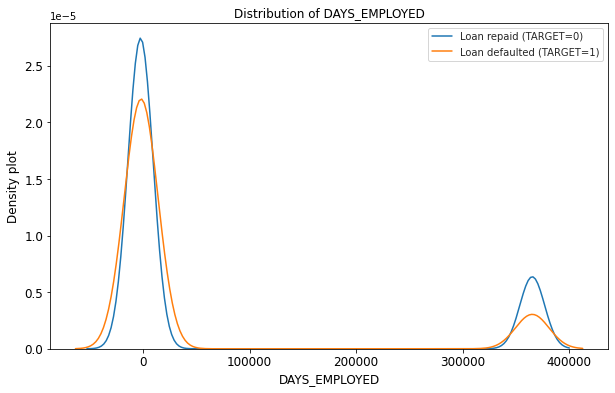

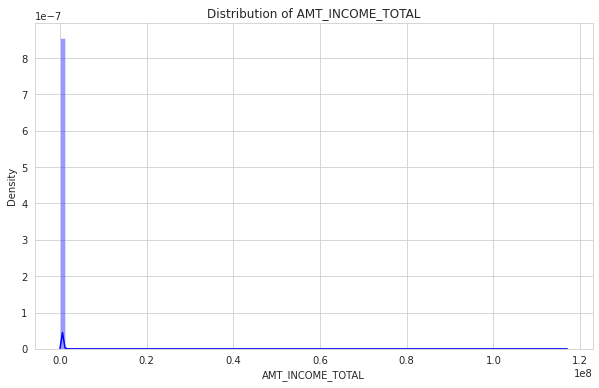

In [20]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)
plot_distribution_gen('AMT_INCOME_TOTAL')

In [21]:

def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

In [22]:
create_income_band(data);

Text(0.5, 1.0, 'Income data for people repaying loans')

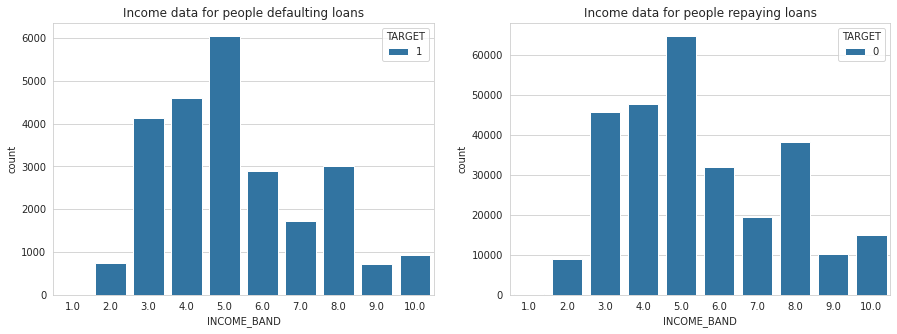

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=data[data.TARGET==1],x='INCOME_BAND',hue='TARGET').set_title('Income data for people defaulting loans')
plt.subplot(122)
sns.countplot(data=data[data.TARGET==0],x='INCOME_BAND',hue='TARGET').set_title('Income data for people repaying loans')

In [24]:
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.nan})

    return df

In [25]:
# Replace all the day outliers
data_new = replace_day_outliers(data)
bureau_new = replace_day_outliers(bureau )              
bureau_balance_new  = replace_day_outliers(bureau_balance)      
credit_card_balance_new  = replace_day_outliers(credit_card_balance) 
installments_payments_new = replace_day_outliers(installments_payments)
pos_cash_balance_new = replace_day_outliers(pos_cash_balance )   
previous_application_new  = replace_day_outliers(previous_application)

In [26]:
def remove_missing_col(df):
    miss_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
    miss_data_col=miss_data[miss_data[0]>60].index
    data_new  = df[[i for i in df.columns if i not in miss_data_col]]
    return data_new

In [27]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [28]:
data_train = pd.get_dummies(data_new)

In [29]:
data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 247 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    SK_ID_CURR                                         307511 non-null  int64  
 1    TARGET                                             307511 non-null  int64  
 2    CNT_CHILDREN                                       307511 non-null  int64  
 3    AMT_INCOME_TOTAL                                   307511 non-null  float64
 4    AMT_CREDIT                                         307511 non-null  float64
 5    AMT_ANNUITY                                        307499 non-null  float64
 6    AMT_GOODS_PRICE                                    307233 non-null  float64
 7    REGION_POPULATION_RELATIVE                         307511 non-null  float64
 8    DAYS_BIRTH                                         307511 non-

In [30]:
# Drop the SK_ID from the training data
from sklearn.preprocessing import MinMaxScaler
skid_temp = data_new['SK_ID_CURR']
train = data_train.drop(columns = ['SK_ID_CURR'])
    
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
data_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', data_train.shape)

Data shape:  (307511, 246)


In [31]:
X= data_train.drop('TARGET',axis=1)
y= data_train['TARGET']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

In [34]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.9193137178386535
RandomForsetClassifier
0.919339733083587
DecisionTreeClassifier
0.8528837899008819
KNeighborsClassifier
0.9144748822810167
XGBClassifier
0.9194307864408543


<AxesSubplot:>

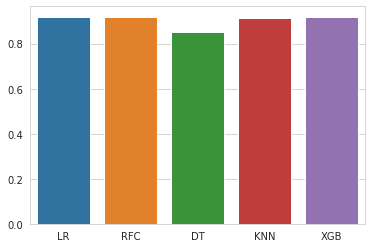

In [35]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     70672
         1.0       0.51      0.03      0.06      6206

    accuracy                           0.92     76878
   macro avg       0.72      0.52      0.51     76878
weighted avg       0.89      0.92      0.89     76878



In [37]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [38]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
rf.feature_importances_

array([5.18999104e-03, 2.46763122e-02, 2.53074247e-02, 3.35834885e-02,
       1.92855962e-02, 2.87553340e-02, 4.23660467e-02, 3.79631284e-02,
       4.26591622e-02, 4.20368543e-02, 1.53708847e-02, 0.00000000e+00,
       6.90795023e-04, 3.51627015e-03, 4.95526844e-04, 3.18575855e-03,
       2.06620577e-03, 7.33610979e-03, 3.16862323e-03, 3.57455521e-03,
       2.43267625e-02, 1.29460953e-03, 1.18335119e-03, 1.26970519e-03,
       3.70286089e-03, 2.85219946e-03, 2.86301867e-03, 3.20781413e-02,
       6.94739677e-02, 5.73125294e-02, 4.35063729e-03, 4.31128263e-03,
       5.13574129e-03, 3.74778226e-03, 3.88477981e-03, 1.06659580e-03,
       3.38089875e-03, 2.12447269e-03, 2.29466382e-03, 5.10099272e-03,
       3.46910395e-03, 5.37463452e-03, 1.78859903e-03, 4.21049344e-03,
       4.24052282e-03, 4.96031224e-03, 5.57917081e-03, 3.88071059e-03,
       4.18459438e-03, 1.06053901e-03, 3.16325997e-03, 1.74535747e-03,
       1.85846939e-03, 5.58599796e-03, 3.80382220e-03, 5.76985547e-03,
      

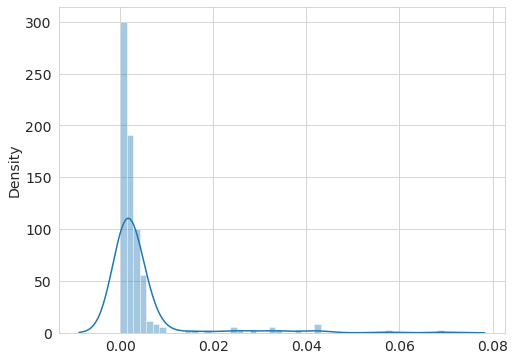

In [40]:
plt.figure(figsize=(8,6))
sns.distplot(rf.feature_importances_)
plt.show()

We can see from the comparisons of accuracy, the Logistic Regression and XGBClassifier have highest accuracy.